# Conclusions for PID project
## Experiments with Control Gains

Two different values for each of proportional, derivative and integral gains were tested. This is a summary of the experiements to choose the best of these 3 pairs of values to achieve both smooth and overall less CTE.

One important change was also made to the PID control law. The total CTE used to compute the integral control was modified as follows:

The method described in the lecture involved adding the CTE from start to the current time step to compute the contribution of the integral error in CTE. The cumulative sum of CTEs lead to saturation of the steering trace at -1 and 1. This is not ideal.

The integral control logic was modified to reset the cumulative sum of the CTEs to zero whenever a sign change was detected between the current and previous CTEs. This means that when the vehicle transitions from one side of the centerline to the other, the cumulative CTE value would be reset to zero and the integral contribution at that time step would be set to zero. This led to a more smoother steering wheel angle.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cwd = os.getcwd()
outPath = os.path.join(cwd,"build")
files = os.listdir(outPath)

csv_files = []
for i in files:
    if i[-3:] == "csv":
        csv_files.append(os.path.join(outPath,i))

# print(csv_files)

Kp = [1,0.1]
Kd = [1,5]
Ki = [0.001,0.01]

## Proportional Control files
p_files = []
key = "_0.000000_0.000000.csv"
for i in csv_files:
    if i[-len(key):] == key:
        p_files.append(i)
        
## PD Control files
pd_files = []
key = "_0.000000_"
for i in csv_files:
    if key in i and not(i in p_files) and not("thr" in i):
        pd_files.append(i)
# print(pd_files)

## PID control files
pid_files = []
key = "_0.000000_"
for i in csv_files:
    if not(key in i) and not("thr" in i):
        pid_files.append(i)
# print(pid_files)

### PID + high speed
## PID control files
pid_highSpeed_files = []
for i in csv_files:
    if "thr" in i:
        pid_highSpeed_files.append(i)
# print(pid_highSpeed_files)

### Proportional Controller
Two values for proportional control were tried. These values are Kp = 0.1 and Kp = 1.0

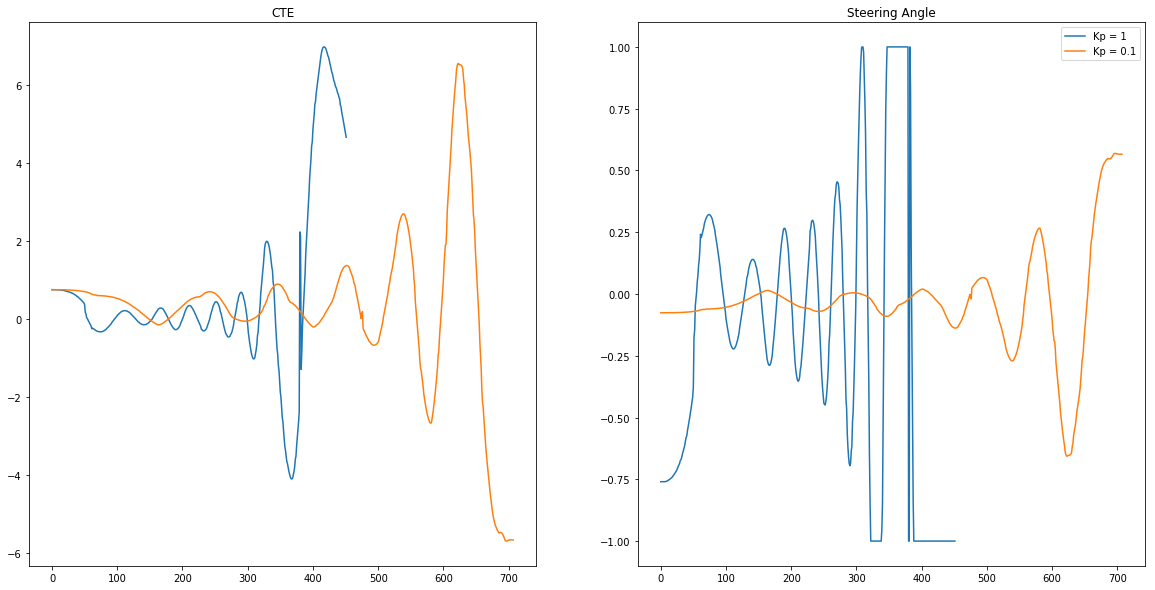

In [2]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
lgd = []
# print(p_files)
for i in range(len(p_files)):
    df_p = pd.read_csv(p_files[i])
    ax[0].plot(df_p["cte"])
    ax[1].plot(df_p["steer"])
    lgd.append("Kp = " + str(Kp[i]))
    ax[0].set_title("CTE")
    ax[1].set_title("Steering Angle")    
plt.legend(lgd)
plt.show()               

This experiment shows that a low Kp value is insufficient to stabilize the lateral movement of the vehicle as seen from the zig-zag motion of the vehicle from both the CTE & steering wheel angle plots. The large overshoots from over-correcting in combination with a changing road curvature leads to instability.

This shows that some derivative action is need to make the controller more stable.

### Proportional-Derivative Control
Two values for derivative action were tested. These are Kd = 1.0 and Kd = 5.0. In combination with the two Kp values, 4 combinations were experimented with. These are discussed below.

['/Users/chansek/Documents/GitHub/CarND-PID-Control-Project-master/build/PID_1.000000_0.000000_5.000000.csv', '/Users/chansek/Documents/GitHub/CarND-PID-Control-Project-master/build/PID_0.100000_0.000000_1.000000.csv', '/Users/chansek/Documents/GitHub/CarND-PID-Control-Project-master/build/PID_0.100000_0.000000_5.000000.csv', '/Users/chansek/Documents/GitHub/CarND-PID-Control-Project-master/build/PID_1.000000_0.000000_1.000000.csv']


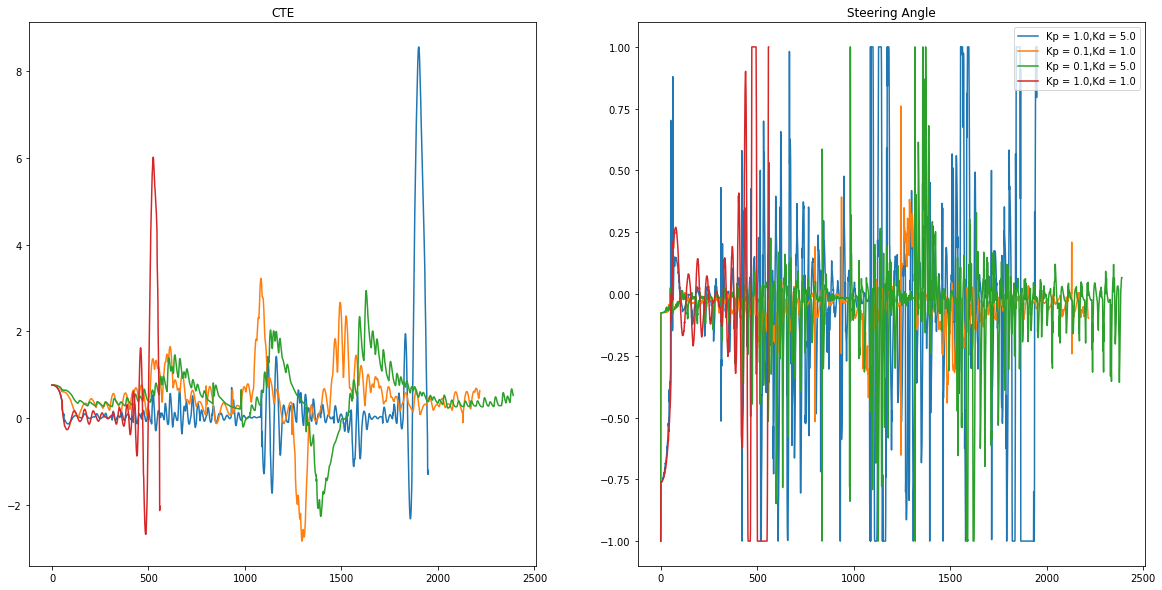

In [3]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
lgd = []
Kp = [1.0,0.1,0.1,1.0]
Kd = [5.0,1.0,5.0,1.0]
print(pd_files)
for i in range(len(pd_files)):
    df_pd = pd.read_csv(pd_files[i])
    ax[0].plot(df_pd["cte"])
    ax[1].plot(df_pd["steer"])
    lgd.append("Kp = " + str(Kp[i]) + ",Kd = " + str(Kd[i]))
    ax[0].set_title("CTE")
    ax[1].set_title("Steering Angle")    
plt.legend(lgd)
plt.show()               

From the plots above, it can be deduced that the proportional gain, Kp = 1.0 is too high for the system and leads to instability. The car fails to complete a lap with this Kp for both values of Kd.

When Kp=0.1, the car completes a lap of the track for both values of Kd. On closer inspection, the response when Kd=5.0 seems to have a lower overall CTE error than for Kd = 1.0. However, the response for Kd=5.0 has instances where the steering trace saturates while for Kd=1.0, the steering trace lies within -0.75 and 0.75. Saturation of steering wheel angle is not ideal but, a low CTE is better for tracking. A trade-off needs to be made between CTE error and preventing steering wheel saturation.

### PID control
Integral action is introduced by varying the integral gain Ki between 0.001 and 0.01 for the 2 combinations discussed in PD control.

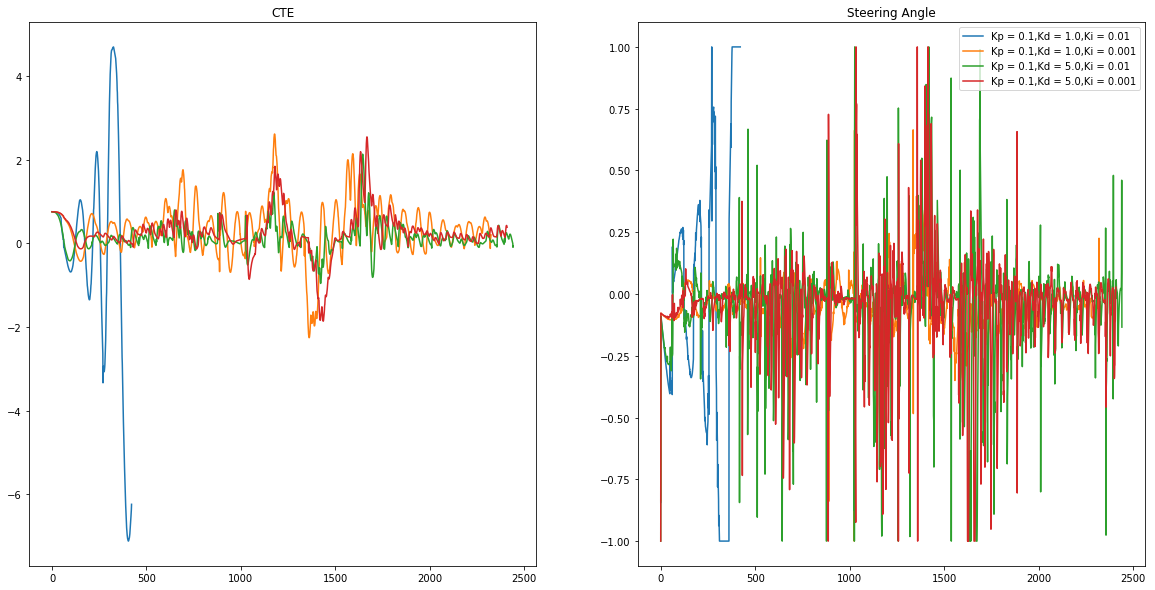

In [4]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
lgd = []
Kp = [0.1,0.1,0.1,0.1]
Kd = [1.0,1.0,5.0,5.0]
Ki = [0.01,0.001,0.01,0.001]
# print(pid_files)
for i in range(len(pid_files)):
    df_pid = pd.read_csv(pid_files[i])
    ax[0].plot(df_pid["cte"])
    ax[1].plot(df_pid["steer"])
    lgd.append("Kp = " + str(Kp[i]) + ",Kd = " + str(Kd[i])+ ",Ki = " + str(Ki[i]))
    ax[0].set_title("CTE")
    ax[1].set_title("Steering Angle")    
plt.legend(lgd)
plt.show()               

The case with Kp=0.1, Kd=1.0 & Ki = 0.01 is unstable and does not complete a lap.

While all the other 3 cases complete a lap, the case with Kd = 5.0 has large steering angle variations compared to the case with Kd=1.0 and Ki=0.001 while having a smooth lateral tracking.

This is clearly a situation where a compromise has to be made for smoother tracking at the expense of a higher SWA variation.

A good set of control gains can be arrived at by increasing the throttle command and comparing these three cases.

### PID control at High Speed
To evaluate the performance of the above 3 control gains, the throttle command was doubled to 0.6.

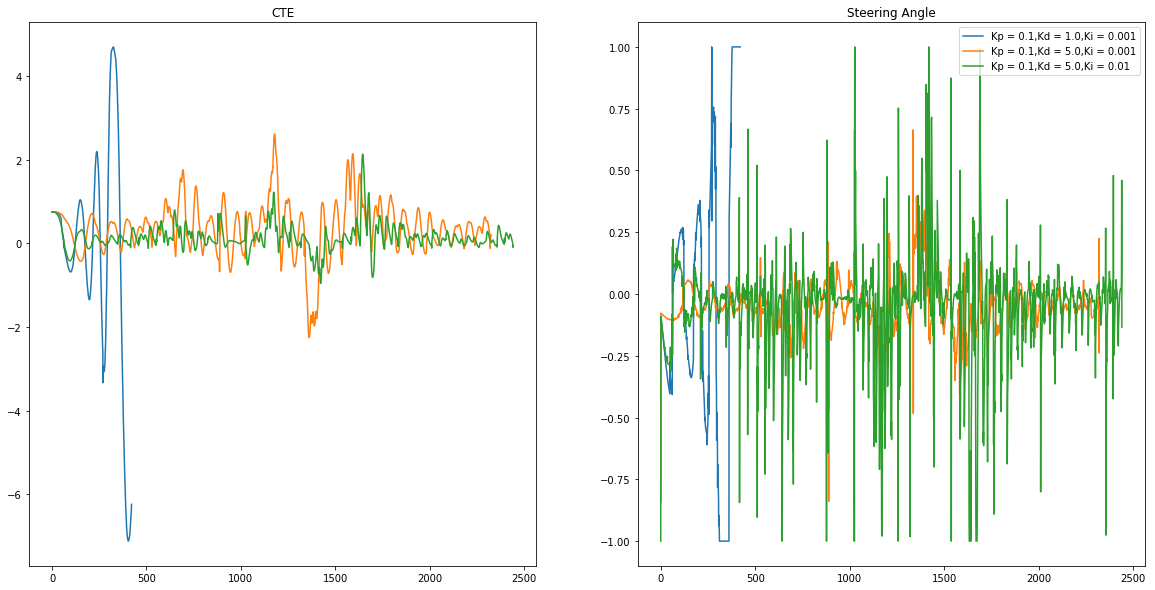

In [5]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
lgd = []
Kp = [0.1,0.1,0.1]
Kd = [1.0,5.0,5.0]
Ki = [0.001,0.001,0.01]
# print(pid_highSpeed_files)
for i in range(len(pid_highSpeed_files)):
    df_pid = pd.read_csv(pid_files[i])
    ax[0].plot(df_pid["cte"])
    ax[1].plot(df_pid["steer"])
    lgd.append("Kp = " + str(Kp[i]) + ",Kd = " + str(Kd[i])+ ",Ki = " + str(Ki[i]))
    ax[0].set_title("CTE")
    ax[1].set_title("Steering Angle")    
plt.legend(lgd)
plt.show()               

Clearly, the case with Kd=1.0 and Ki = 0.001 is unable to keep up with the CTE at high speeds.

Kd = 5.0 seems to be the better derivative gain.
For the integral gain, Ki = 0.001 seems to perform better in terms of Steering command smoothness with a slightly higher CTE compared to Ki = 0.01.

I would therefore choose Kp=0.1, Kd=5 and Ki = 0.001 for a better control of the vehicle.